In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import pywt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Data Preprocessing

In [2]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')


In [3]:
def crop_img_2eye(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
            

In [4]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"


import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [5]:
img_dirs

['./data/Akshay',
 './data/cropped',
 './data/Depika',
 './data/kohli',
 './data/messi',
 './data/m_Sharapova',
 './data/Nora',
 './data/Ranbir',
 './data/Urvashi']

In [6]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)



In [7]:

cropped_image_dirs = []
for img_dir in img_dirs:
#     print(img_dir)
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    for entry in os.scandir(img_dir):
#         print(entry.path)
        try:
            roi_color = crop_img_2eye(entry.path)
        except:
            continue
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1

Generating cropped images in folder:  ./data/cropped/Akshay
Generating cropped images in folder:  ./data/cropped/Depika
Generating cropped images in folder:  ./data/cropped/kohli
Generating cropped images in folder:  ./data/cropped/messi
Generating cropped images in folder:  ./data/cropped/m_Sharapova
Generating cropped images in folder:  ./data/cropped/Nora
Generating cropped images in folder:  ./data/cropped/Ranbir
Generating cropped images in folder:  ./data/cropped/Urvashi


In [8]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Akshay': ['./data/cropped/Akshay\\Akshay Kumar10.png',
  './data/cropped/Akshay\\Akshay Kumar13.png',
  './data/cropped/Akshay\\Akshay Kumar15.png',
  './data/cropped/Akshay\\Akshay Kumar17.png',
  './data/cropped/Akshay\\Akshay Kumar18.png',
  './data/cropped/Akshay\\Akshay Kumar19.png',
  './data/cropped/Akshay\\Akshay Kumar2.png',
  './data/cropped/Akshay\\Akshay Kumar20.png',
  './data/cropped/Akshay\\Akshay Kumar21.png',
  './data/cropped/Akshay\\Akshay Kumar22.png',
  './data/cropped/Akshay\\Akshay Kumar23.png',
  './data/cropped/Akshay\\Akshay Kumar24.png',
  './data/cropped/Akshay\\Akshay Kumar25.png',
  './data/cropped/Akshay\\Akshay Kumar26.png',
  './data/cropped/Akshay\\Akshay Kumar27.png',
  './data/cropped/Akshay\\Akshay Kumar28.png',
  './data/cropped/Akshay\\Akshay Kumar29.png',
  './data/cropped/Akshay\\Akshay Kumar3.png',
  './data/cropped/Akshay\\Akshay Kumar30.png',
  './data/cropped/Akshay\\Akshay Kumar31.png',
  './data/cropped/Akshay\\Akshay Kumar32.png',
  './

In [9]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [10]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [11]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [12]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(413, 4096)

In [13]:
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

In [14]:
from collections import Counter
Counter(y)

Counter({0: 49, 1: 56, 2: 48, 3: 39, 4: 35, 5: 41, 6: 52, 7: 93})

# Modeling

In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)


In [17]:

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


## Hyper Parameter Tunning

In [18]:
scores=[]
best_estimators = {}


model_params = {  

    
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,3,4,5,6,7,18,19,20,21,22,23,24],
            'algorithm' : ['auto','ball_tree','kd_tree'],
            'weights' : ['uniform','distance'],
            'leaf_size' : [27,28,29,30,31,32,33,34,35]
        }
    },
    
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [None,1,2,6,5,4,3]
        }
    },
    
    
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [30,35,40,45,50,55,58,60,65,70],
            'learning_rate' : [0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,2],
            'algorithm' : ['SAMME', 'SAMME.R']
        }
    },
    
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            
        }
    },
    
     'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'C': [1,2,3,4,5,6,7,8,9,10],
            'solver' : [ 'liblinear', 'lbfgs'],
            'multi_class' : ['auto', 'ovr' ]
        }
    },
    
        
    'SVM': {
        'model': SVC(),
        'params': {
             'C': [1,2,3,5,6,7],
             'kernel': ['rbf','linear'],
             'gamma': ['auto', 'scale']
        }
    },
       
    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,3,4,5,10,15,20,25,30],
            'criterion': ['entropy'],
            'random_state' : [11,12,13],
            'max_depth' : [4,5,6]

        }
    }
}

In [19]:
import time


for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train, y_train)    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) {'C': [1, 5, 10], 'solver': ['liblinear', 'lbfgs'], 'multi_class': ['auto', 'ovr']}
2.2964407642682394 minutes
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) {'C': [1, 50, 100], 'kernel': ['rbf', 'linear'], 'gamma': ['auto', 'scale']}
0.4627497633298238 minutes
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=No

In [20]:
import pandas as pd    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df = df.sort_values(by='best_score',ascending=False)
df

,model,best_score,best_params
0,LOGISTIC_REGRESSION,0.748485,"{'C': 1, 'multi_class': 'ovr', 'solver': 'lbfgs'}"
1,SVM,0.736364,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
2,RANDOM_FOREST,0.624242,"{'criterion': 'entropy', 'n_estimators': 70}"


In [ ]:
df2.best_params[0]

 ## Evaluation

In [21]:
best_estimators['LOGISTIC_REGRESSION'].score(X_test,y_test)

0.7831325301204819

In [22]:
best_estimators['SVM'].score(X_test,y_test)

0.7710843373493976

In [23]:
best_estimators['RANDOM_FOREST'].score(X_test,y_test)

0.6626506024096386

In [ ]:
cross_val_score(best_estimators['RANDOM_FOREST'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['KNeighborsClassifier'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['GaussianNB'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['DecisionTreeClassifier'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['SVM'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['LOGISTIC_REGRESSION'],X_test,y_test,cv=5).mean()

In [ ]:
cross_val_score(best_estimators['AdaBoostClassifier'],X_test,y_test,cv=5).mean()

In [ ]:

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = metrics.roc_curve(y_test,best_estimators['LOGISTIC_REGRESSION'].predict(X_test))
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = metrics.roc_curve(y_test,best_estimators['GaussianNB'].predict(X_test))
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = metrics.roc_curve(y_test,best_estimators['RANDOM_FOREST'].predict(X_test))                                                             
# xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = metrics.roc_curve(y_test,best_estimators['XGBoost'].predict(X_test))
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = metrics.roc_curve(y_test,best_estimators['KNeighborsClassifier'].predict(X_test))
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = metrics.roc_curve(y_test,best_estimators['DecisionTreeClassifier'].predict(X_test))
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = metrics.roc_curve(y_test,best_estimators['SVM'].predict(X_test))
ada_false_positive_rate,ada_true_positive_rate,ada_threshold = metrics.roc_curve(y_test,best_estimators['AdaBoostClassifier'].predict(X_test))


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
# plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(ada_false_positive_rate,ada_true_positive_rate,label='AdaBoost Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [27]:
#who ever performs best 

best_clf = best_estimators['LOGISTIC_REGRESSION']
best_clf

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.86      0.80      0.83        15
           2       0.78      0.78      0.78         9
           3       0.83      0.62      0.71         8
           4       0.83      0.83      0.83         6
           5       0.70      0.78      0.74         9
           6       1.00      0.73      0.84        11
           7       0.65      0.88      0.75        17

    accuracy                           0.78        83
   macro avg       0.81      0.77      0.79        83
weighted avg       0.80      0.78      0.79        83



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0,  0,  0,  1],
       [ 0, 12,  0,  0,  1,  1,  0,  1],
       [ 0,  0,  7,  0,  0,  0,  0,  2],
       [ 0,  0,  1,  5,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  5,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  2],
       [ 1,  0,  1,  0,  0,  0,  8,  1],
       [ 0,  2,  0,  0,  0,  0,  0, 15]], dtype=int64)

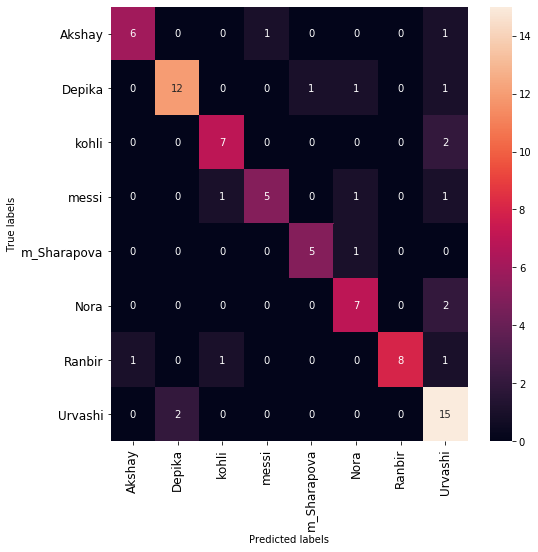

In [31]:

import seaborn as sns 
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(cm,annot=True,ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
ax.xaxis.set_ticklabels(class_dict.keys()); ax.yaxis.set_ticklabels(class_dict.keys());
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 


In [32]:
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'm_Sharapova': 4,
 'Nora': 5,
 'Ranbir': 6,
 'Urvashi': 7}

## Save Model

In [33]:
lr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.fit(X,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
import joblib
joblib.dump(lr, 'saved_model.pkl')

['saved_model.pkl']

## Save Labels

In [36]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))